In [1]:
import sys
sys.path.append('c:/users/shubh/programming_work/virtual_envs/genai_exp_env/lib/site-packages')


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt


In [3]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns


In [3]:
# Generate Sample Data (100 samples, 10 features)
np.random.seed(42)


In [4]:
# Generate Multi-Label Targets (100 samples, each having 3 possible labels)



In [5]:
df_final_aggregated = pd.read_csv("df_final_aggregated.csv")



In [6]:
df_final_aggregated.head()

,Unnamed: 0,spotify_id,Love and Relationships,Self-Reflection and Personal Struggles,Social and Political Themes,Celebration and Fun,Philosophical and Existential,Storytelling and Narrative,Escape and Fantasy,Spiritual and Religious,...,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,id,lyrics,youtube_video_id,video_id
0,0,0d28khcov6AiegSCpG5TuT,0,0,0,1,0,0,1,0,...,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),0d28khcov6AiegSCpG5TuT,"Feel good\n Sha, sha-ba-da, sha-ba-da-ca, feel...",HyHNuVaZJ-k,HyHNuVaZJ-k
1,1,1foMv2HQwfQ2vntFf9HFeG,0,0,0,0,1,1,1,0,...,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,1foMv2HQwfQ2vntFf9HFeG,I'm a scary gargoyle on a tower\n That you mad...,yYDmaexVHic,yYDmaexVHic
2,2,64dLd6rVqDLtkXFYrEUHIU,0,1,0,0,0,1,1,0,...,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,64dLd6rVqDLtkXFYrEUHIU,But in the magic cove\n There's a pretty one\n...,qJa-VFwPpYA,qJa-VFwPpYA
3,3,0q6LuUqGLUiCPP1cbdwFs3,1,1,0,0,0,0,1,0,...,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),0q6LuUqGLUiCPP1cbdwFs3,Up on Melancholy Hill\n There's a plastic tree...,04mfKJWDSzI,04mfKJWDSzI
4,4,7yMiX7n9SBvadzox8T5jzT,0,0,0,1,1,1,0,0,...,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),7yMiX7n9SBvadzox8T5jzT,"I ain't happy, I'm feeling glad\n I got sunshi...",1V_xRb0x9aw,1V_xRb0x9aw


In [7]:
comment_categories = [

    "Humor and Memes",
    "Appreciation and Praise",
    "Words of empathy",
    "Personal Stories and Experiences"    
]

In [8]:
lyric_categories = [

    "Love and Relationships",
    "Self-Reflection and Personal Struggles",
    "Social and Political Themes",
    "Celebration and Fun",
    "Philosophical and Existential",
    "Storytelling and Narrative",
    "Escape and Fantasy",
    "Spiritual and Religious",
    "Cultural and Lifestyle",
    "Fun and Humor"
]

In [9]:
spotify_attributes = [
    # "spotify_id",
    "Danceability",	
    "Energy",	
    "Key",	
    "Loudness",	
    "Speechiness",	
    "Acousticness",	
    "Instrumentalness",	
    "Liveness",	
    "Valence",	
    "Tempo",	
    "Duration_ms"
    
]

In [10]:
df_final_aggregated[ comment_categories ]

,Humor and Memes,Appreciation and Praise,Words of empathy,Personal Stories and Experiences
0,3,7,1,1
1,9,6,1,0
2,3,10,1,1
3,6,7,2,1
4,5,7,1,5
...,...,...,...,...
3230,0,8,4,3
3231,2,7,1,5
3232,2,8,1,3
3233,1,3,6,5


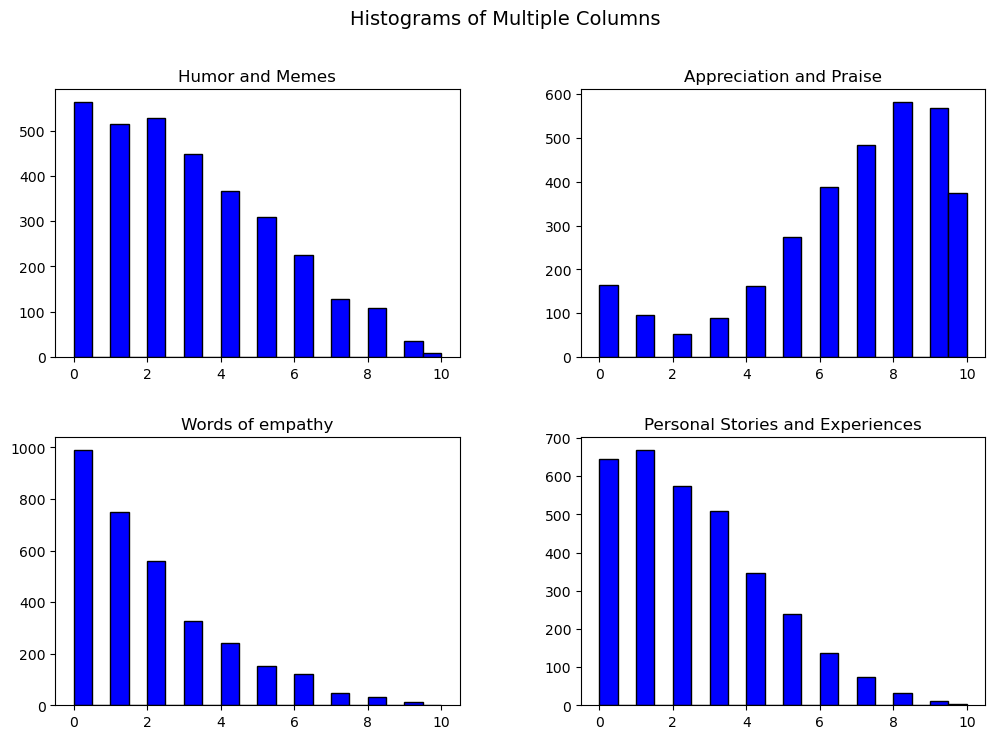

In [11]:
# Plot histograms for all numeric columns
df_final_aggregated[comment_categories].hist(figsize=(12, 8), bins=20, color="blue", edgecolor="black", grid=False)

# Show the plot
plt.suptitle("Histograms of Multiple Columns", fontsize=14)
plt.show()

In [12]:
# Define the percentiles to compute
percentiles = [0.25, 0.5, 0.75, 0.95]  # 25th, 50th (median), 75th, 95th percentiles

# Compute percentiles for each column
percentile_values = df_final_aggregated[comment_categories].quantile(percentiles)

# Display the results
print(percentile_values)

      Humor and Memes  Appreciation and Praise  Words of empathy  \
0.25              1.0                      5.0               0.0   
0.50              3.0                      7.0               1.0   
0.75              5.0                      9.0               3.0   
0.95              7.0                     10.0               6.0   

      Personal Stories and Experiences  
0.25                               1.0  
0.50                               2.0  
0.75                               4.0  
0.95                               6.0  


In [13]:
df_final_aggregated[comment_categories].head()

,Humor and Memes,Appreciation and Praise,Words of empathy,Personal Stories and Experiences
0,3,7,1,1
1,9,6,1,0
2,3,10,1,1
3,6,7,2,1
4,5,7,1,5


In [14]:
# Compute the 50th percentile (median) for each column
median_values = df_final_aggregated[comment_categories].quantile(0.5)

# Apply thresholding: set to 0 if less than median, 1 if greater
# df_final_aggregated[comment_categories] = df_final_aggregated[comment_categories].apply(lambda x: (x > median_values).astype(int))
df_final_aggregated[comment_categories] = df_final_aggregated[comment_categories].gt(median_values).astype(int)


# Display the updated DataFrame
df_final_aggregated[comment_categories].head()


,Humor and Memes,Appreciation and Praise,Words of empathy,Personal Stories and Experiences
0,0,0,0,0
1,1,0,0,0
2,0,1,0,0
3,1,0,1,0
4,1,0,0,1


In [15]:
len(df_final_aggregated)

3235

In [16]:
for col in comment_categories:
    print( f"{col}", df_final_aggregated[col].sum(), len(df_final_aggregated) , df_final_aggregated[col].sum()/len(df_final_aggregated))

Humor and Memes 1182 3235 0.3653786707882535
Appreciation and Praise 1525 3235 0.4714064914992272
Words of empathy 1497 3235 0.46275115919629056
Personal Stories and Experiences 1350 3235 0.41731066460587324


In [17]:
df_final_aggregated.head()

,Unnamed: 0,spotify_id,Love and Relationships,Self-Reflection and Personal Struggles,Social and Political Themes,Celebration and Fun,Philosophical and Existential,Storytelling and Narrative,Escape and Fantasy,Spiritual and Religious,...,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,id,lyrics,youtube_video_id,video_id
0,0,0d28khcov6AiegSCpG5TuT,0,0,0,1,0,0,1,0,...,0.6130,0.772,138.559,222640.0,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),0d28khcov6AiegSCpG5TuT,"Feel good\n Sha, sha-ba-da, sha-ba-da-ca, feel...",HyHNuVaZJ-k,HyHNuVaZJ-k
1,1,1foMv2HQwfQ2vntFf9HFeG,0,0,0,0,1,1,1,0,...,0.0463,0.852,92.761,200173.0,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,1foMv2HQwfQ2vntFf9HFeG,I'm a scary gargoyle on a tower\n That you mad...,yYDmaexVHic,yYDmaexVHic
2,2,64dLd6rVqDLtkXFYrEUHIU,0,1,0,0,0,1,1,0,...,0.1160,0.551,108.014,215150.0,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,64dLd6rVqDLtkXFYrEUHIU,But in the magic cove\n There's a pretty one\n...,qJa-VFwPpYA,qJa-VFwPpYA
3,3,0q6LuUqGLUiCPP1cbdwFs3,1,1,0,0,0,0,1,0,...,0.0640,0.578,120.423,233867.0,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),0q6LuUqGLUiCPP1cbdwFs3,Up on Melancholy Hill\n There's a plastic tree...,04mfKJWDSzI,04mfKJWDSzI
4,4,7yMiX7n9SBvadzox8T5jzT,0,0,0,1,1,1,0,0,...,0.0698,0.525,167.953,340920.0,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),7yMiX7n9SBvadzox8T5jzT,"I ain't happy, I'm feeling glad\n I got sunshi...",1V_xRb0x9aw,1V_xRb0x9aw


In [18]:
label_names = comment_categories

In [19]:
feature_names = spotify_attributes + lyric_categories

In [20]:
feature_names

['Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Love and Relationships',
 'Self-Reflection and Personal Struggles',
 'Social and Political Themes',
 'Celebration and Fun',
 'Philosophical and Existential',
 'Storytelling and Narrative',
 'Escape and Fantasy',
 'Spiritual and Religious',
 'Cultural and Lifestyle',
 'Fun and Humor']

In [21]:
for col in df_final_aggregated.columns:
    print(col, 0)
    print(col.strip(), 0)

Unnamed: 0 0
Unnamed: 0 0
spotify_id 0
spotify_id 0
Love and Relationships 0
Love and Relationships 0
Self-Reflection and Personal Struggles 0
Self-Reflection and Personal Struggles 0
Social and Political Themes 0
Social and Political Themes 0
Celebration and Fun 0
Celebration and Fun 0
Philosophical and Existential 0
Philosophical and Existential 0
Storytelling and Narrative 0
Storytelling and Narrative 0
Escape and Fantasy 0
Escape and Fantasy 0
Spiritual and Religious 0
Spiritual and Religious 0
Cultural and Lifestyle 0
Cultural and Lifestyle 0
Fun and Humor 0
Fun and Humor 0
Humor and Memes 0
Humor and Memes 0
Appreciation and Praise 0
Appreciation and Praise 0
Words of encouragement 0
Words of encouragement 0
Words of empathy 0
Words of empathy 0
Personal Stories and Experiences 0
Personal Stories and Experiences 0
Nostalgia and Memories 0
Nostalgia and Memories 0
Artist 0
Artist 0
Url_spotify 0
Url_spotify 0
Track 0
Track 0
Album 0
Album 0
Album_type 0
Album_type 0
Uri 0
Uri 0
Da

In [22]:
df_final_aggregated.columns = df_final_aggregated.columns.str.strip()


In [23]:
df_final_aggregated[feature_names]

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Love and Relationships,Self-Reflection and Personal Struggles,Social and Political Themes,Celebration and Fun,Philosophical and Existential,Storytelling and Narrative,Escape and Fantasy,Spiritual and Religious,Cultural and Lifestyle,Fun and Humor
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,...,0,0,0,1,0,0,1,0,0,0
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,...,0,0,0,0,1,1,1,0,0,0
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,...,0,1,0,0,0,1,1,0,0,0
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,...,1,1,0,0,0,0,1,0,0,0
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,0.425,0.242,0.0,-15.424,0.0267,0.880000,0.011800,0.1950,0.477,92.472,...,1,1,0,0,0,0,1,0,0,0
3231,0.590,0.737,7.0,-5.867,0.0384,0.404000,0.000000,0.1080,0.877,132.966,...,1,0,0,1,0,0,0,0,0,0
3232,0.618,0.704,4.0,-4.686,0.0321,0.159000,0.000262,0.3580,0.741,124.218,...,1,0,0,1,0,0,0,0,0,0
3233,0.388,0.449,3.0,-12.584,0.0880,0.443000,0.000000,0.2650,0.692,179.651,...,1,1,0,0,0,0,0,0,0,0


### Model building process

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling only to the specified columns
df_final_aggregated[spotify_attributes] = scaler.fit_transform(df_final_aggregated[spotify_attributes])

# Display the updated DataFrame
print(df_final_aggregated.head())


   Unnamed: 0              spotify_id  Love and Relationships  \
0           0  0d28khcov6AiegSCpG5TuT                       0   
1           1  1foMv2HQwfQ2vntFf9HFeG                       0   
2           2  64dLd6rVqDLtkXFYrEUHIU                       0   
3           3  0q6LuUqGLUiCPP1cbdwFs3                       1   
4           4  7yMiX7n9SBvadzox8T5jzT                       0   

   Self-Reflection and Personal Struggles  Social and Political Themes  \
0                                       0                            0   
1                                       0                            0   
2                                       1                            0   
3                                       1                            0   
4                                       0                            0   

   Celebration and Fun  Philosophical and Existential  \
0                    1                              0   
1                    0                            

In [25]:
df_final_aggregated[feature_names]

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,...,Love and Relationships,Self-Reflection and Personal Struggles,Social and Political Themes,Celebration and Fun,Philosophical and Existential,Storytelling and Narrative,Escape and Fantasy,Spiritual and Religious,Cultural and Lifestyle,Fun and Humor
0,1.355189,0.308004,0.218227,0.318709,1.148811,-0.956147,-0.225927,2.632401,0.879722,0.613216,...,0,0,0,1,0,0,1,0,0,0
1,0.460004,0.298517,0.776741,0.563969,-0.570165,-0.675509,-0.239515,-0.884116,1.211524,-0.964273,...,0,0,0,0,1,1,1,0,0,0
2,0.579782,1.342092,-1.178061,1.099058,-0.312553,-0.834158,0.142681,-0.451610,-0.036880,-0.438891,...,0,1,0,0,0,1,1,0,0,0
3,0.541957,0.469284,-0.898803,0.565389,-0.619346,-0.985964,3.964386,-0.774283,0.075103,-0.011469,...,1,1,0,0,0,0,1,0,0,0
4,0.378050,0.255825,1.335256,-0.234263,1.078553,-0.895617,-0.245196,-0.738292,-0.144716,1.625679,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,-1.122329,-1.888247,-1.457318,-2.163705,-0.611149,2.158381,-0.147607,0.038605,-0.343797,-0.974228,...,1,1,0,0,0,0,1,0,0,0
3231,-0.082150,0.459797,0.497484,0.549208,-0.474146,0.457547,-0.245196,-0.501252,1.315212,0.420568,...,1,0,0,1,0,0,0,0,0,0
3232,0.094365,0.303261,-0.340288,0.884455,-0.547917,-0.417883,-0.243030,1.050061,0.751149,0.119248,...,1,0,0,1,0,0,0,0,0,0
3233,-1.355582,-0.906338,-0.619546,-1.357524,0.106652,0.596901,-0.245196,0.472973,0.547921,2.028610,...,1,1,0,0,0,0,0,0,0,0


In [26]:

X_df = df_final_aggregated[feature_names]
Y_df = df_final_aggregated[ label_names ]

# Split Data into Train and Test Sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)

# Train a Multi-Label Classifier using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
multi_label_clf = MultiOutputClassifier(rf)  # Converts any classifier into a multi-label classifier
multi_label_clf.fit(X_train, Y_train)

# Predictions
Y_pred = multi_label_clf.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(Y_test, Y_pred)  # Computes subset accuracy (exact match)
f1 = f1_score(Y_test, Y_pred, average="micro")  # F1-score considering all labels

print(f"Subset Accuracy: {accuracy:.4f}")
print(f"Micro F1-Score: {f1:.4f}")


Subset Accuracy: 0.1716
Micro F1-Score: 0.5315


### A subset accuracy of 0.1716 is considered reasonable for use-cases where there are 4 target variables.

### A Micro F1-Score too is considered a moderately good score for mulit-class multi-lab

## Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Wrap it with MultiOutputClassifier to handle multiple labels
multi_label_gb_model = MultiOutputClassifier(gb_model)

# Hyperparameter grid for tuning
param_grid_gb = {
    'estimator__n_estimators': [100, 200],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_samples_split': [2, 5],
    'estimator__min_samples_leaf': [1, 2]
}

# GridSearchCV for hyperparameter tuning
grid_search_gb = GridSearchCV(estimator=multi_label_gb_model, param_grid=param_grid_gb, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search_gb.fit(X_train, Y_train)

# Print the best parameters and score
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Score for Gradient Boosting (on training set with CV):", grid_search_gb.best_score_)

# Predict on the test set
best_gb_model = grid_search_gb.best_estimator_
Y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(Y_test, Y_pred_gb)
f1_gb = f1_score(Y_test, Y_pred_gb, average="micro")

print(f"Gradient Boosting Test Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boosting Micro F1-Score: {f1_gb:.4f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters for Gradient Boosting: {'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__min_samples_leaf': 2, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 200}
Best Score for Gradient Boosting (on training set with CV): 0.16769233388806293
Gradient Boosting Test Accuracy: 0.1855
Gradient Boosting Micro F1-Score: 0.5260


## XGBoost

In [31]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, objective="binary:logistic", eval_metric="logloss")

# Wrap the model with MultiOutputClassifier to handle multi-label classification
multi_label_xgb_model = MultiOutputClassifier(xgb_model)

# Hyperparameter grid for tuning
param_grid_xgb = {
    'estimator__n_estimators': [100, 200],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 5, 7],
    'estimator__min_child_weight': [1, 2, 5],
    'estimator__subsample': [0.8, 1.0]
}

# GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=multi_label_xgb_model, param_grid=param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model with GridSearchCV
grid_search_xgb.fit(X_train, Y_train)

# Print the best hyperparameters and the best score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score for XGBoost (on training set with CV):", grid_search_xgb.best_score_)

# Predict on the test set
best_xgb_model = grid_search_xgb.best_estimator_
Y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the model on the test set
accuracy_xgb = accuracy_score(Y_test, Y_pred_xgb)
f1_xgb = f1_score(Y_test, Y_pred_xgb, average="micro")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=2

In [32]:
print(f"XGBoost Test Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Micro F1-Score: {f1_xgb:.4f}")

XGBoost Test Accuracy: 0.1932
XGBoost Micro F1-Score: 0.5379
